## Import Libraries

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [61]:
data_COST = pd.read_csv('Stock Price\COST.csv')
data_KO = pd.read_csv('Stock Price\KO.csv')

In [62]:
length_data = len(data_COST)     # rows that data has
split_ratio = 0.7           # %70 train + %30 validation
length_train = round(length_data * split_ratio)  
length_validation = length_data - length_train
print("Data length :", length_data)
print("Train data length :", length_train)
print("Validation data lenth :", length_validation)

Data length : 5787
Train data length : 4051
Validation data lenth : 1736


## Prepare training data

In [63]:
train_data_COST = data_COST[:length_train].iloc[:,:2] 
train_data_COST['Date'] = pd.to_datetime(train_data_COST['Date'])  # converting to date time object
train_data_COST['Date']=train_data_COST['Date'].dt.date
train_data_COST

,Date,Open
0,2000-03-01,45.53
1,2000-04-01,44.53
2,2000-05-01,42.25
3,2000-06-01,43.20
4,2000-07-01,44.50
...,...,...
4046,2016-03-02,149.28
4047,2016-04-02,145.00
4048,2016-05-02,143.27
4049,2016-08-02,142.74


In [64]:
train_data_KO = data_KO[:length_train].iloc[:,:2] 
train_data_KO['Date'] = pd.to_datetime(train_data_KO['Date'])  # converting to date time object
train_data_KO['Date']=train_data_KO['Date'].dt.date
train_data_KO

,Date,Open
0,2000-03-01,28.66
1,2000-04-01,27.88
2,2000-05-01,28.22
3,2000-06-01,28.53
4,2000-07-01,29.25
...,...,...
4046,2016-03-02,42.80
4047,2016-04-02,42.52
4048,2016-05-02,42.93
4049,2016-08-02,42.17


## Prepare validation data

In [65]:
validation_data_COST = data_COST[length_train:].iloc[:,:2]
validation_data_COST['Date'] = pd.to_datetime(validation_data_COST['Date'])  # converting to date time object
validation_data_COST['Date']=validation_data_COST['Date'].dt.date
validation_data_COST

,Date,Open
4051,2016-10-02,149.37
4052,2016-11-02,147.13
4053,2016-12-02,147.98
4054,2016-02-16,149.35
4055,2016-02-17,149.75
...,...,...
5782,2022-12-23,457.52
5783,2022-12-27,464.40
5784,2022-12-28,457.54
5785,2022-12-29,455.63


In [66]:
validation_data_KO = data_KO[length_train:].iloc[:,:2]
validation_data_KO['Date'] = pd.to_datetime(validation_data_KO['Date'])  # converting to date time object
validation_data_KO['Date']=validation_data_KO['Date'].dt.date
validation_data_KO

,Date,Open
4051,2016-10-02,43.34
4052,2016-11-02,42.03
4053,2016-12-02,42.72
4054,2016-02-16,43.32
4055,2016-02-17,43.42
...,...,...
5782,2022-12-23,63.50
5783,2022-12-27,63.93
5784,2022-12-28,64.46
5785,2022-12-29,63.80


## Pre-Training processing

In [67]:
dataset_train_COST = train_data_COST.Open.values
dataset_train_COST = np.reshape(dataset_train_COST, (-1,1))
dataset_train_COST.shape

(4051, 1)

In [68]:
dataset_train_KO = train_data_KO.Open.values
dataset_train_KO = np.reshape(dataset_train_KO, (-1,1))
dataset_train_KO.shape

(4051, 1)

In [69]:
scaler_COST = MinMaxScaler(feature_range = (0,1))
# scaling dataset
dataset_train_scaled_COST = scaler_COST.fit_transform(dataset_train_COST)

dataset_train_scaled_COST.shape

(4051, 1)

In [70]:
scaler_KO = MinMaxScaler(feature_range = (0,1))
# scaling dataset
dataset_train_scaled_KO = scaler_KO.fit_transform(dataset_train_KO)

dataset_train_scaled_KO.shape

(4051, 1)

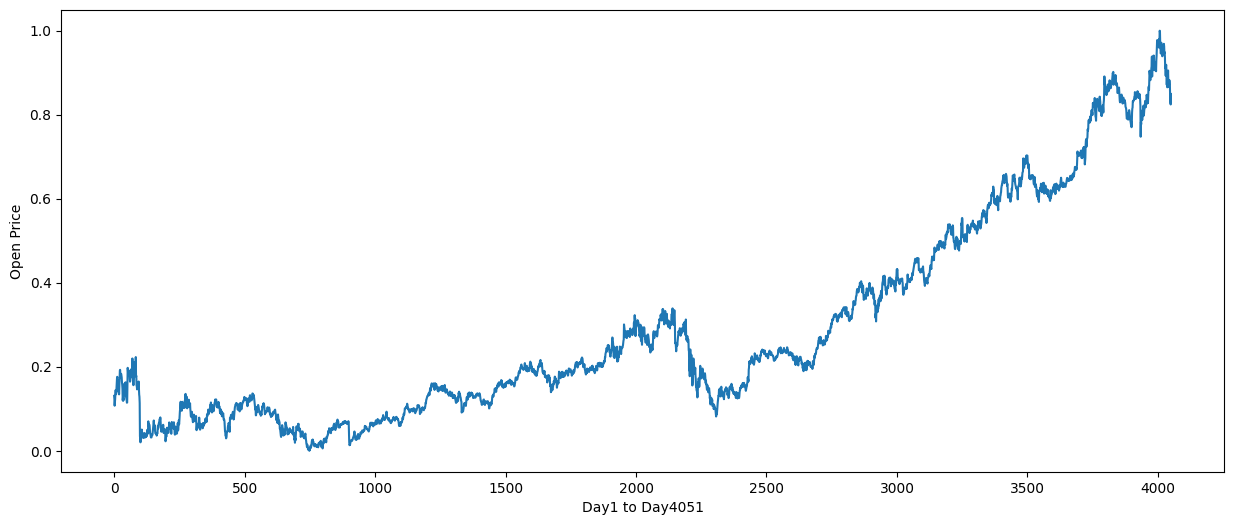

In [71]:
plt.subplots(figsize = (15,6))
plt.plot(dataset_train_scaled_COST)
plt.xlabel("Day1 to Day4051")
plt.ylabel("Open Price")
plt.show()

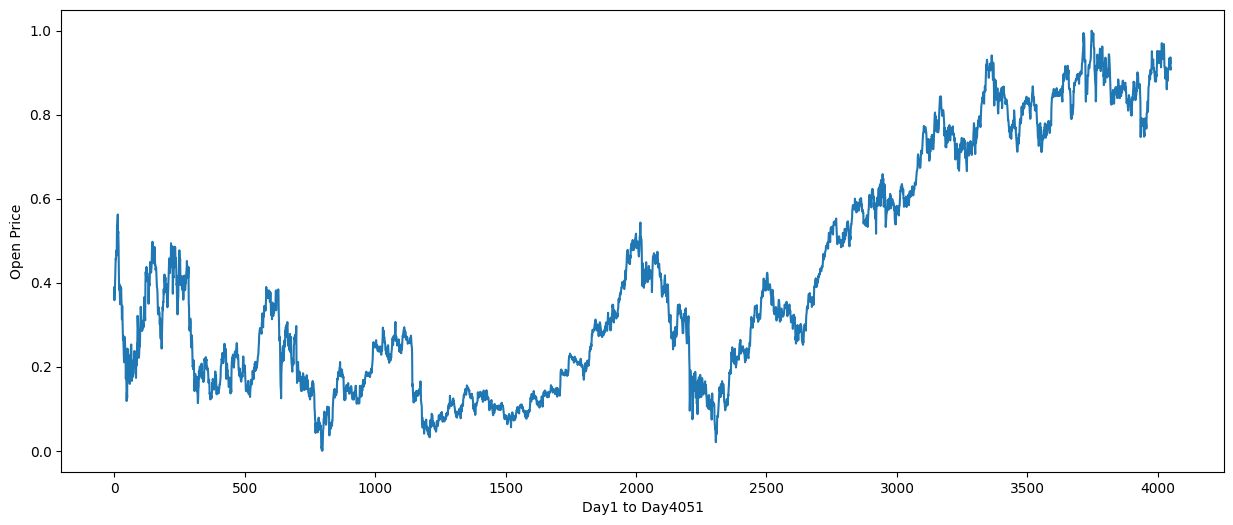

In [72]:
plt.subplots(figsize = (15,6))
plt.plot(dataset_train_scaled_KO)
plt.xlabel("Day1 to Day4051")
plt.ylabel("Open Price")
plt.show()

In [73]:
X_train_COST = []
X_train_KO = []
y_train_COST = []
y_train_KO = []

time_step = 14

for i in range(time_step, length_train):
    X_train_COST.append(dataset_train_scaled_COST[i-time_step:i,0])
    X_train_KO.append(dataset_train_scaled_KO[i-time_step:i,0])
    y_train_COST.append(dataset_train_scaled_COST[i,0])
    y_train_KO.append(dataset_train_scaled_KO[i,0])
    
# convert list to array
X_train_COST, X_train_KO, y_train_COST, y_train_KO = np.array(X_train_COST),np.array(X_train_KO), np.array(y_train_COST), np.array(y_train_KO)

In [74]:
X_train_COST = np.reshape(X_train_COST, (X_train_COST.shape[0], X_train_COST.shape[1],1))
y_train_COST = np.reshape(y_train_COST, (y_train_COST.shape[0],1))
X_train_KO = np.reshape(X_train_KO, (X_train_KO.shape[0], X_train_KO.shape[1],1))
y_train_KO = np.reshape(y_train_KO, (y_train_KO.shape[0],1))

## Building the model|

In [75]:
from keras.models import Sequential, Model
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Input
from keras.layers import Concatenate
from tensorflow import keras
import tensorflow as tf

In [76]:
# Define the shape of your inputs
timesteps = 14
input_dim1 = X_train_COST.shape[-1]
input_dim2 = X_train_KO.shape[-1]

# Define the inputs for each LSTM
input1 = Input(shape=(timesteps, input_dim1))
lstm1 = LSTM(32)(input1)

input2 = Input(shape=(timesteps, input_dim2))
lstm2 = LSTM(32)(input2)

# Define the dense input
dense_input = Input(shape=(1,))

# Concatenate the LSTM outputs and the dense input
concat = Concatenate()([lstm1, lstm2, dense_input])

# Define the final dense layer
output = Dense(1, activation='linear')(concat)

# Define the model
model = Model(inputs=[input1, input2, dense_input], outputs=output)
model.compile(loss='mean_squared_error', optimizer='adam', metrics = ['accuracy'])

# Train the model
history = model.fit([X_train_COST, X_train_KO, np.ones((X_train_COST.shape[0], 1))], y_train_COST, batch_size=32, epochs=100)

Epoch 1/100
127/127 [==============================] - 2s 3ms/step - loss: 0.0094 - accuracy: 4.9542e-04
Epoch 2/100
127/127 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 4.9542e-04
Epoch 3/100
127/127 [==============================] - 0s 2ms/step - loss: 3.9214e-04 - accuracy: 4.9542e-04
Epoch 4/100
127/127 [==============================] - 0s 2ms/step - loss: 2.3355e-04 - accuracy: 4.9542e-04
Epoch 5/100
127/127 [==============================] - 0s 2ms/step - loss: 2.0587e-04 - accuracy: 4.9542e-04
Epoch 6/100
127/127 [==============================] - 0s 2ms/step - loss: 2.0121e-04 - accuracy: 4.9542e-04
Epoch 7/100
127/127 [==============================] - 0s 2ms/step - loss: 2.0118e-04 - accuracy: 4.9542e-04
Epoch 8/100
127/127 [==============================] - 0s 2ms/step - loss: 1.9647e-04 - accuracy: 4.9542e-04
Epoch 9/100
127/127 [==============================] - 0s 2ms/step - loss: 2.0453e-04 - accuracy: 4.9542e-04
Epoch 10/100
127/127 [=====

In [77]:
print(model.summary())

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 14, 1)]      0           []                               
                                                                                                  
 input_5 (InputLayer)           [(None, 14, 1)]      0           []                               
                                                                                                  
 lstm_2 (LSTM)                  (None, 32)           4352        ['input_4[0][0]']                
                                                                                                  
 lstm_3 (LSTM)                  (None, 32)           4352        ['input_5[0][0]']                
                                                                                            

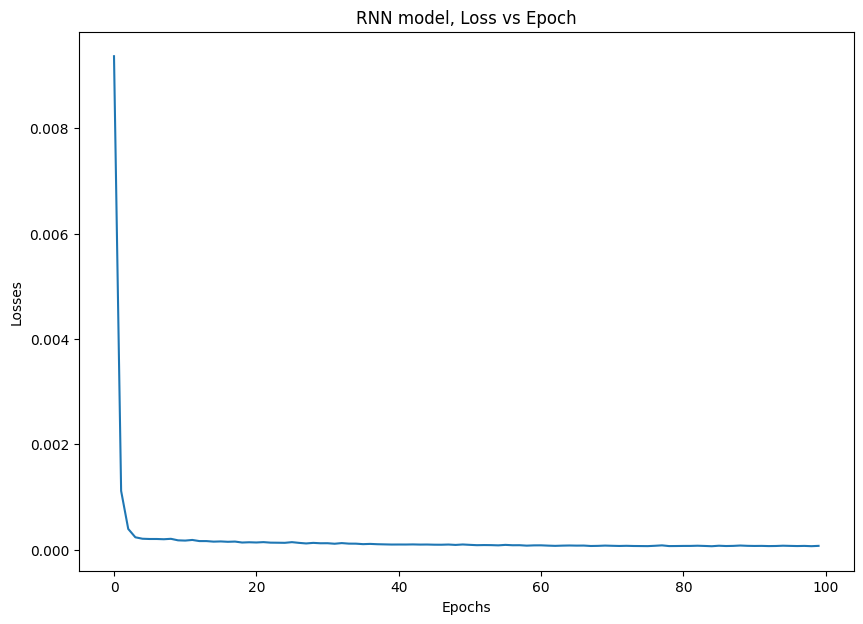

In [78]:
# Plotting Loss vs Epochs
plt.figure(figsize =(10,7))
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("RNN model, Loss vs Epoch")
plt.show()

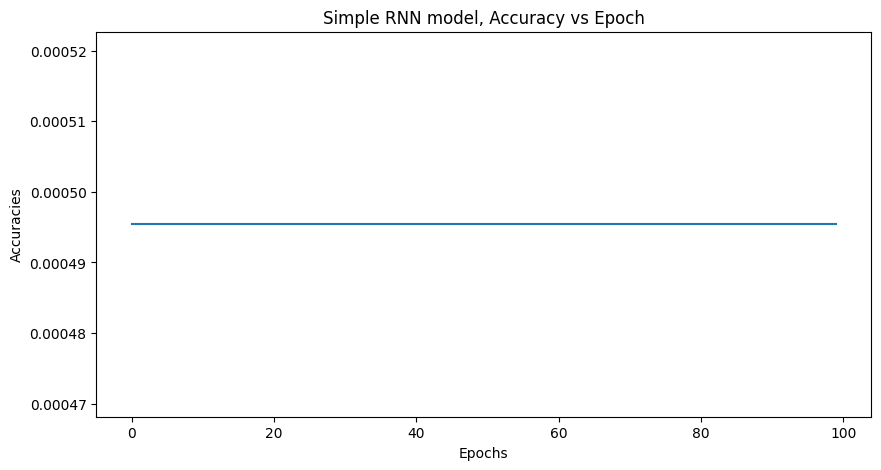

In [79]:
# Plotting Accuracy vs Epochs
plt.figure(figsize =(10,5))
plt.plot(history.history["accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracies")
plt.title("Simple RNN model, Accuracy vs Epoch")
plt.show()

In [80]:
y_pred_COST = model.predict([X_train_COST, X_train_KO, np.ones((X_train_COST.shape[0], 1))])
y_pred_COST = scaler_COST.inverse_transform(y_pred_COST) # scaling back from 0-1 to original
y_pred_COST.shape

127/127 [==============================] - 0s 928us/step


(4037, 1)

In [81]:
y_train_COST = scaler_COST.inverse_transform(y_train_COST) # scaling back from 0-1 to original
y_train_COST.shape

(4037, 1)

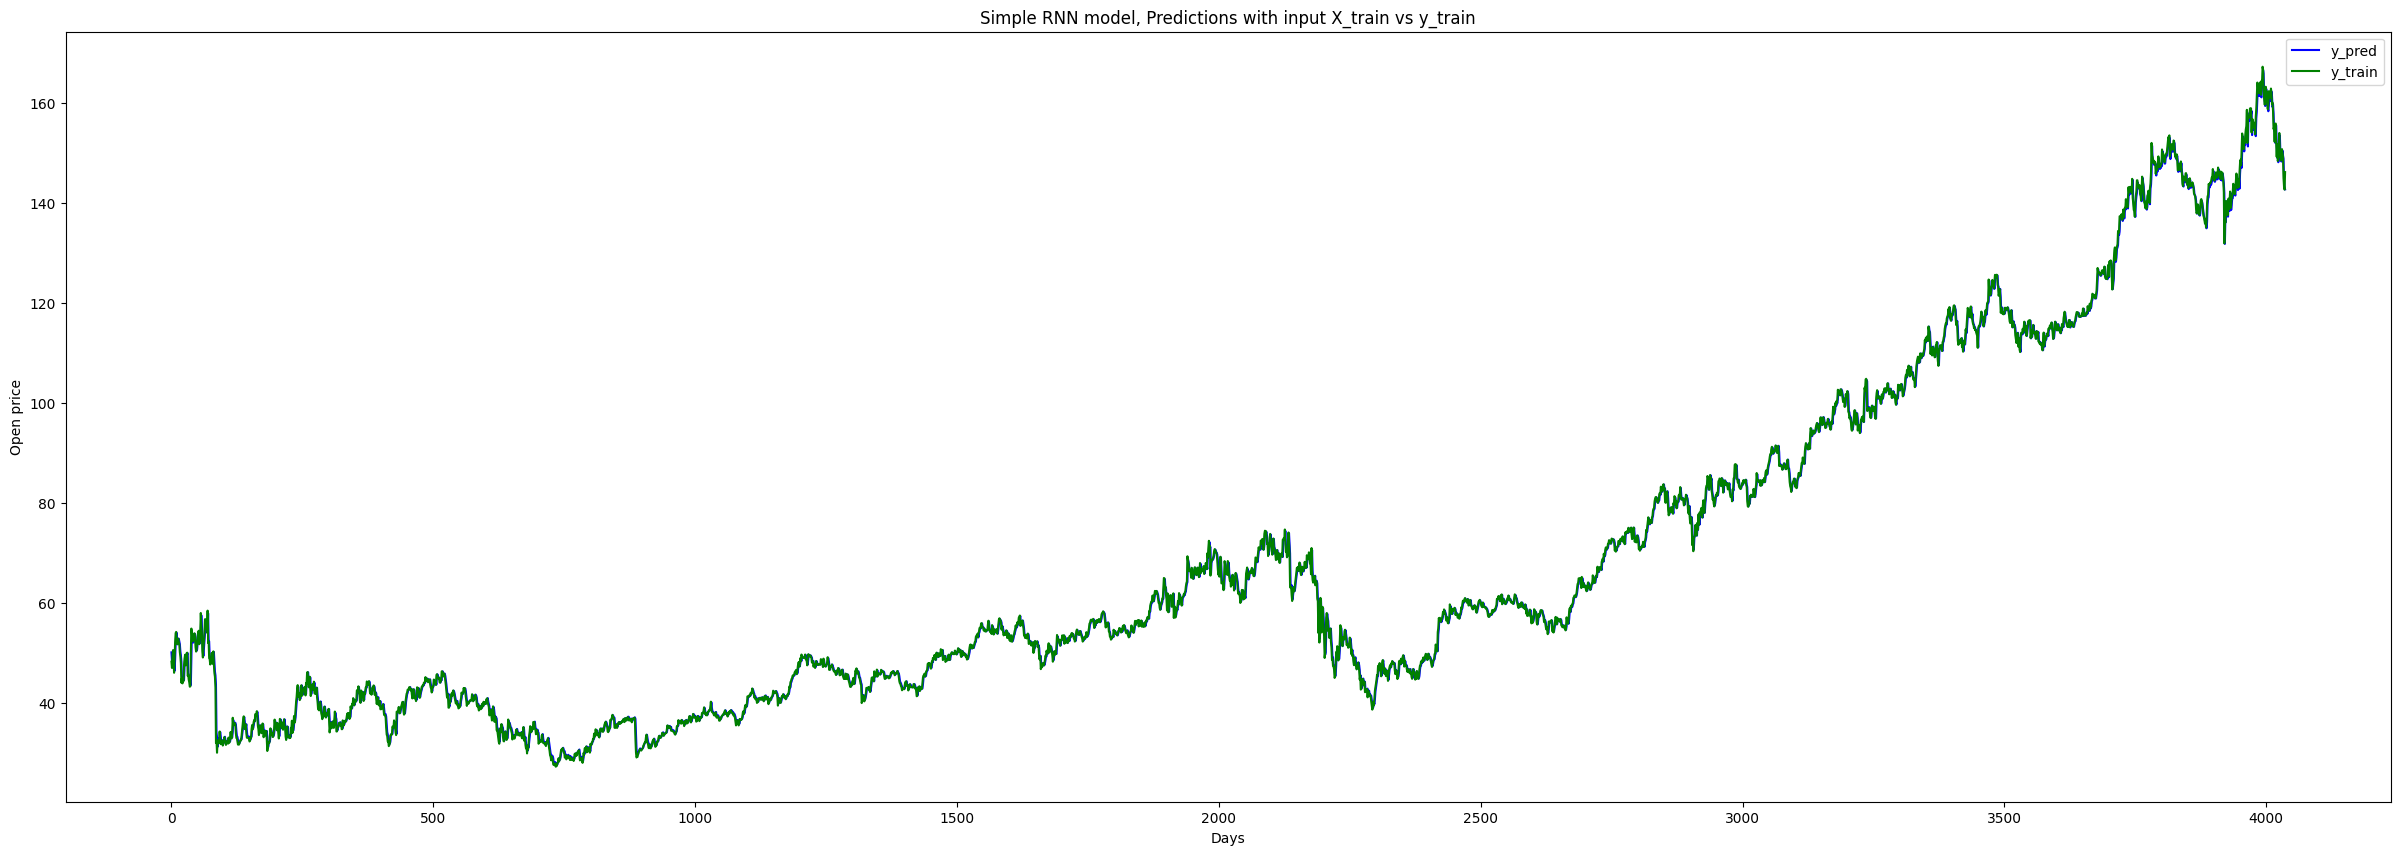

In [82]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred_COST, color = "b", label = "y_pred" )
plt.plot(y_train_COST, color = "g", label = "y_train")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Predictions with input X_train vs y_train")
plt.legend()
plt.show()

In [83]:
dataset_validation_COST = validation_data_COST.Open.values  # getting "open" column and converting to array
dataset_validation_COST = np.reshape(dataset_validation_COST, (-1,1))  # converting 1D to 2D array
scaled_dataset_validation_COST =  scaler_COST.fit_transform(dataset_validation_COST)  # scaling open values to between 0 and 1
print("Shape of scaled validation dataset :",scaled_dataset_validation_COST.shape)

Shape of scaled validation dataset : (1736, 1)


In [84]:
dataset_validation_KO = validation_data_KO.Open.values  # getting "open" column and converting to array
dataset_validation_KO = np.reshape(dataset_validation_KO, (-1,1))  # converting 1D to 2D array
scaled_dataset_validation_KO =  scaler_KO.fit_transform(dataset_validation_KO)  # scaling open values to between 0 and 1
print("Shape of scaled validation dataset :",scaled_dataset_validation_KO.shape)

Shape of scaled validation dataset : (1736, 1)


In [85]:
# Creating X_test and y_test
X_test_COST = []
X_test_KO = []
y_test_KO = []
y_test_COST = []

for i in range(time_step, length_validation):
    X_test_COST.append(scaled_dataset_validation_COST[i-time_step:i,0])
    X_test_KO.append(scaled_dataset_validation_KO[i-time_step:i,0])
    y_test_COST.append(scaled_dataset_validation_COST[i,0])
    y_test_KO.append(scaled_dataset_validation_KO[i,0])

In [86]:
X_test_COST, X_test_KO, y_test_COST, y_test_KO= np.array(X_test_COST), np.array(X_test_KO), np.array(y_test_COST), np.array(y_test_KO)

In [87]:
X_test_COST = np.reshape(X_test_COST, (X_test_COST.shape[0],X_test_COST.shape[1],1))  # reshape to 3D array
X_test_KO = np.reshape(X_test_KO, (X_test_KO.shape[0],X_test_KO.shape[1],1))  # reshape to 3D array
y_test_COST = np.reshape(y_test_COST, (-1,1))  # reshape to 2D array
y_test_KO = np.reshape(y_test_KO, (-1,1))  # reshape to 2D array

In [88]:
y_pred_of_test_COST = model.predict([X_test_COST, X_test_KO, np.ones((X_test_COST.shape[0], 1))])
y_pred_of_test_COST = scaler_COST.inverse_transform(y_pred_of_test_COST) # scaling back from 0-1 to original
y_pred_of_test_COST.shape

54/54 [==============================] - 0s 984us/step


(1722, 1)

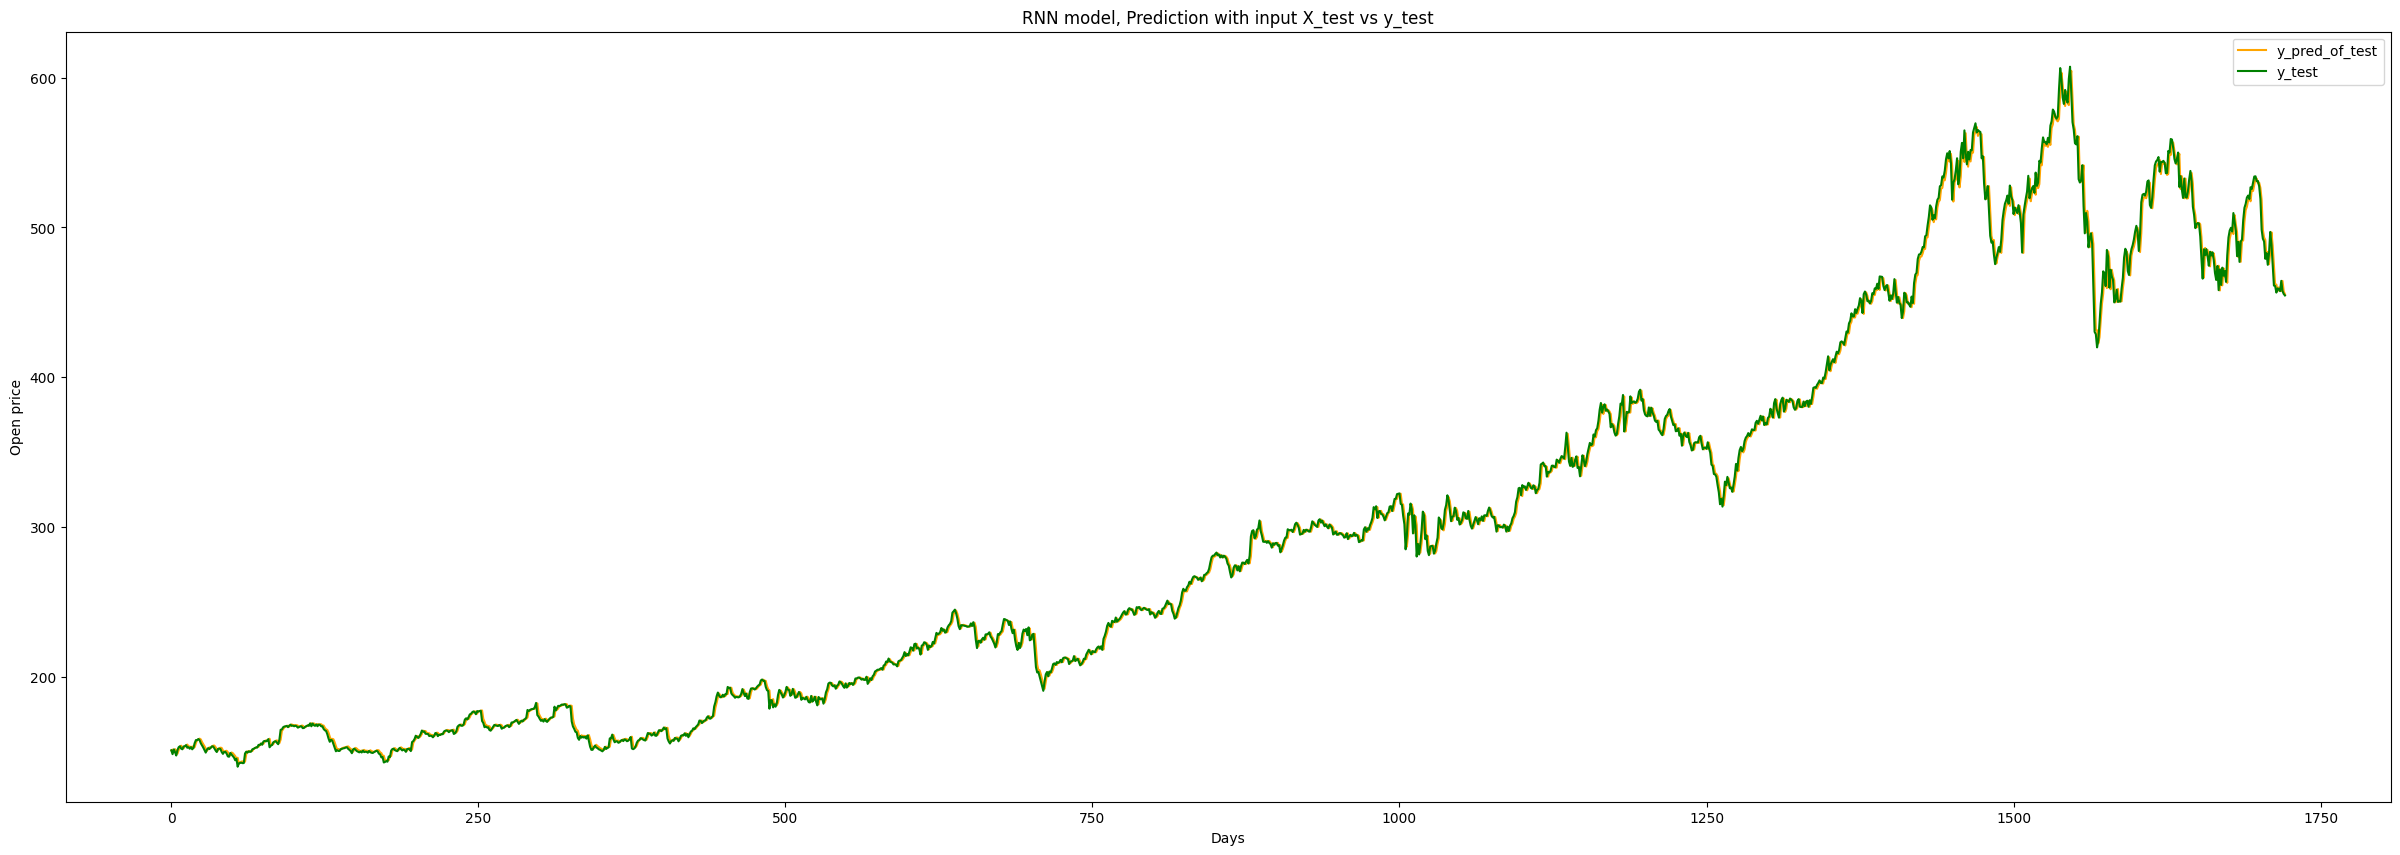

In [89]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred_of_test_COST, label = "y_pred_of_test", c = "orange")
plt.plot(scaler_COST.inverse_transform(y_test_COST), label = "y_test", c = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("RNN model, Prediction with input X_test vs y_test")
plt.legend()
plt.show()